#  Découvrez l’algorithme k-means - Exemple avec le dataset Iris

# 1 Preliminary

## 1.1 Context

Ce notebook est en lien le chapitre l'activité Découvrez l’algorithme k-means

Nous allons travailler sur le jeu de données iris.

## 1.2 Imports

Importons les librairies

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

In [21]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

## 1.3 Graphics

Chargeons les librairies graphiques

In [22]:
sns.set()

## 1.4 Data

Chargeons les données. Nous utiliserons le dataframe `iris`, directement présent dans `scikit-learn`. 

Il faudra travailler un peu pour pouvoir l'utiliser correctement. Ne pretez pas trop attention aux lignes ci dessous.

In [23]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = [i.split('(')[0].replace(" ", "_")[:-1] for i in df.columns]
X = df.copy()
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2 About K-means

Nous allons effectuer un clustering avec l'algorithme du k-means.

## 2.1 Given a spefic cluster number

Testons tout d'abord avec un nombre défini de clusters.

On instancie notre estimateur:



In [24]:
kmeans = KMeans(n_clusters=3)

On l'entraine : 

In [25]:
kmeans.fit(X)

KMeans(n_clusters=3)

On peut calculer son inertie : 

In [26]:
kmeans.inertia_

78.85144142614601

## 2.2 Using the elbow method

Passons à la méthode du coude.

On défini d'abord une liste vide pour sotcker nos inerties: 

In [27]:
intertia = []

On défini ensuite la liste du nombre de clusters que l'on veut tester:

In [28]:
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

Ensuite, pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie : 

In [29]:
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X) 
  intertia.append(kmeans.inertia_)

Nous obtenons une liste d'inerties :

In [30]:
intertia

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.49540655046708,
 29.990426406926403,
 27.910706766917293]

Il ne nous reste plus qu'à afficher le resultat :

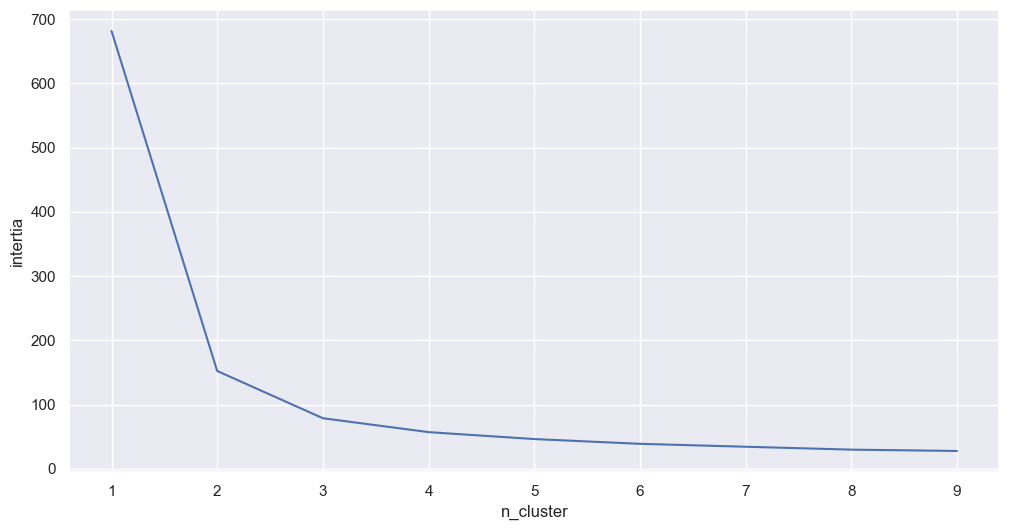

In [31]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

## 2.3 Clusters

Regardons maintenant les clusters que nous avons obtenus.

Nous devons d'abord ré-entrainer un estimateur:

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

Voici les clusters : 

In [33]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

-- **ATTENTION** --  
Ici, `0`,`1`,`2` est à considérer comme une variable catégorielle cardinale. Il n'y a pas d'ordre entre les clusters.

Le cluster `0` n'est pas *supérieur* au cluster `1` par exemple. Considérez que c'est plus un *id* qu'une *valeur*. 






Pour être plus clair, nous allons utiliser des lettres plutôt que des nombres: 


In [34]:
dd = {i:j for i,j in enumerate(list("abc"))}
dd

{0: 'a', 1: 'b', 2: 'c'}

In [35]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']

Disons que c'est plus clair maintenant...


Ajoutons nos labels à `X`

In [36]:
X["cluster"] = labels
X

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,a
1,4.9,3.0,1.4,0.2,a
2,4.7,3.2,1.3,0.2,a
3,4.6,3.1,1.5,0.2,a
4,5.0,3.6,1.4,0.2,a
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,c
146,6.3,2.5,5.0,1.9,b
147,6.5,3.0,5.2,2.0,c
148,6.2,3.4,5.4,2.3,c


Affichons cela de façon graphique :

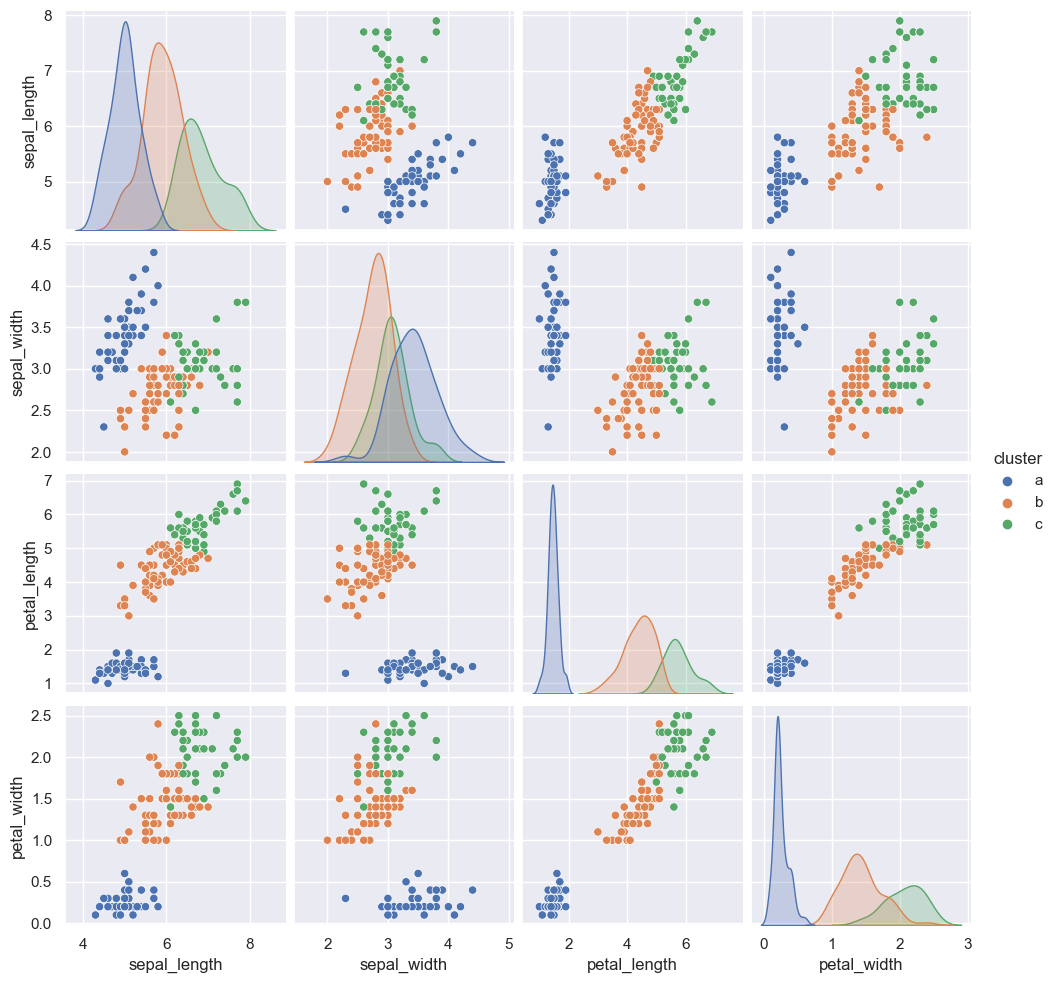

In [37]:
sns.pairplot(X, hue="cluster");